# Workflow & Hyperparameter Optimization

In [30]:
import pandas as pd
import seaborn as sns
import numpy as np

👇 Import the house price data set. We will only keep numerical feature for sake of simplicity

Your goal will be to fit the best KNN Regressor. And in particular, how many "neighbors" (K in KNN) should you consider to best predict your house-price?

In [31]:
# Load raw data
data = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/houses_train_raw.csv')

# Only keep numerical columns and raws without NaN
data = data.select_dtypes(include=np.number).dropna()

data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [32]:
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

## 1. Train/Test split

👇 Split the data to create your `X_train` `X_test` and `y_train` `y_test`. Use:
- `test_size=0.3`
- `random_state=0` to compare with your buddy

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 2. Scaling

Scaling is always very important for KNN.

❓ _Standard-Scale_ your training set

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_train

array([[-1.37511158, -0.87871936,  0.18688486, ..., -0.14608468,
        -0.11071095,  0.16828509],
       [-1.30912075, -0.87871936,  2.10800891, ..., -0.14608468,
        -1.96535592, -0.57711328],
       [ 0.57633154, -0.87871936, -0.45348983, ..., -0.14608468,
         0.26021804, -0.57711328],
       ...,
       [ 0.88978798, -0.87871936,  0.40034309, ...,  3.97498424,
        -1.22349793, -1.32251165],
       [ 0.04133445, -0.14400627, -0.45348983, ..., -0.14608468,
        -0.48163994,  0.16828509],
       [ 0.41135447, -0.87871936, -0.45348983, ..., -0.14608468,
        -0.11071095, -0.57711328]])

## 3. Baseline KNN model

❓ 5-fold cross validate a simple KNN regressor taking into account only the closest neighbor, and compute its mean cv-score

In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate

neigh = KNeighborsRegressor(n_neighbors=1)
neigh.fit(X_train, y_train)
cv_results = cross_validate(neigh, X_train, y_train, cv=5)
cv_score = cv_results['test_score'].mean()
cv_score

0.569025195507008

## 4. Grid search

Let's use sklearn `GridSearchCV` to find the best KNN hyperparameter `n_neighbors`.
- Start coarse-grain approach, with `n_neighbors` = [1,5,10,20,50]
- 5-fold cross validate each combination
- Be sure to maximize your performance time using `n_jobs`

In [36]:
from sklearn.model_selection import GridSearchCV

grid = {'n_neighbors' : [1,5,10,20,50]}

search = GridSearchCV(KNeighborsRegressor(), grid, 
                           scoring = 'r2',
                           cv = 5,
                           n_jobs=-1)
search.fit(X_train,y_train)

# Best score
search.best_score_

0.7594265833471792

In [37]:
# Best Params
search.best_params_

{'n_neighbors': 20}

In [38]:
# Best estimator
search.best_estimator_

KNeighborsRegressor(n_neighbors=20)

❓ According to the grid search, what is the optimal K value?

❓ What is the best score the optimal K value produced?

We now have an idea about where the best k lies, but some of the values we did not try could be better!

Re-run a fine-grain grid search with k values around to your previous best value

❓ What is the `best_score` and `best_k` you find?

In [46]:
grid = {'n_neighbors' : np.arange(10, 25)}

search = GridSearchCV(KNeighborsRegressor(), grid, 
                           scoring = 'r2',
                           cv = 5,
                           n_jobs=-1)
search.fit(X_train,y_train)

# Best score
search.best_score_

0.7655062000041237

In [47]:
best_score = search.best_score_
best_k = search.best_params_['n_neighbors']

In [48]:
# Best Params
search.best_params_

{'n_neighbors': 14}

#### 🧪 Test your code

In [49]:
from nbresult import ChallengeResult
result = ChallengeResult('knn',
                         best_k=best_k,
                         best_score=best_score)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /home/useradd/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/useradd/code/LucaVanTichelen/data-challenges/05-ML/05-Model-Tuning/01-Workflow
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 2 items

tests/test_knn.py::TestKnn::test_best_k PASSED                           [ 50%]
tests/test_knn.py::TestKnn::test_best_score PASSED                       [100%]

============================== 2 passed in 0.19s ===============================


💯 You can commit your code:

git add tests/knn.pickle

git commit -m 'Completed knn step'

git push origin master


/home/useradd/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/home/useradd/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/home/useradd/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/home/useradd/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/home/useradd/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does n

### Visual check

☝️ This problem is actually simple enough to perform a grid search manually.
- Loop manually over all values of k from 1 to 50 and store the mean cv-scores of each model in a list.
- Plot the score as a function of k to visualy find the best k

In [50]:
cv_score_list = []
for i in range(1, 51):
    neigh = KNeighborsRegressor(n_neighbors=i)
    neigh.fit(X_train, y_train)
    cv_results = cross_validate(neigh, X_train, y_train, cv=5)
    cv_score = cv_results['test_score'].mean()
    cv_score_list.append(cv_score)

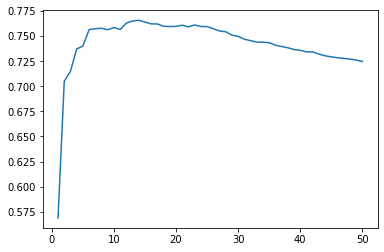

In [57]:
import matplotlib.pyplot as plt

k = np.arange(1, 51)
plt.plot(k, cv_score_list);

❓Can you guess what makes GridSearchCV a better option than such manual loop ?
 
<details>
    <summary>Answer</summary>

- Sklearn's `n_jobs=-1` allows you to paralellize search of each CPU
- What if you had multiple hyper-parameters to co-optimize ?
</details>

## 5. Multiple params

KNNRegressor suppports various _distance metrics_ via the hyper-parameter `p` [see docs](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

❓Use GridSearchCV to search for best `k` and `p` at the same time: Try all combinations for `k` = [1, 5, 10, 20, 50] and `p` = [1, 2, 3]. 

In [122]:
grid = {'n_neighbors' : [1, 5, 10, 20, 50],
       'p' : [1, 2, 3]}

search = GridSearchCV(KNeighborsRegressor(), grid, 
                           scoring = 'r2',
                           cv = 5,
                           n_jobs=-1)
search.fit(X_train,y_train)

# Best score
search.best_score_

0.7978142226309175

In [60]:
search.best_params_

{'n_neighbors': 10, 'p': 1}

❓ How many models did you trained overall?

<details>
    <summary>Hint</summary>

Much more than 15. Think twice :)
    <details>
    <summary>Answer</summary>

75 models due to CV=5
</details>

❓ What are the best parameters and the best score?

## 6. Random Search

Now let's see if a Random Search can find a better combination with the same number of model fits?
Use `RandomizedSearchCV` to
- Randomly sample `k` from a uniform `randint(1,50)` distribition
- Sample `p` from a list [1,2,3]
- Use the correct number of `n_iter` and `cv` to fit the exact same number of models than in your previous GridSearchCV.

In [121]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

grid = {'n_neighbors' : randint(1,50),
       'p' : [1, 2, 3]}

search = RandomizedSearchCV(KNeighborsRegressor(), grid, 
                           scoring = 'r2',
                           n_iter = 15,
                           cv = 5,
                           n_jobs=-1)
search.fit(X_train,y_train)

# Best score
search.best_params_

{'n_neighbors': 7, 'p': 1}

In [77]:
randint(1,50)

## 7. Generalization

👇 This is your final chance to fine-tune your model
- Refine your RandomsearchCV if you wish
- Choose your best model hyper-params and instantiate it
- Re-fit it on the __entire__ train set

In [112]:
grid = {'n_neighbors' : randint(1,15),
       'p' : [1, 2, 3]}

search = RandomizedSearchCV(KNeighborsRegressor(), grid, 
                           scoring = 'r2',
                           n_iter = 75,
                           cv = 5,
                           n_jobs=-1)
search.fit(X_train,y_train)

# Best score
search.best_estimator_

KNeighborsRegressor(n_neighbors=2, p=1)

👇 Time has come to discover our model's performance on the **unseen** test set `X_test`. Compute the r2 score for the test set and save it as `r2_test`.

In [136]:
neigh = KNeighborsRegressor(n_neighbors=14, p=1)
scaler.fit(X_test)
X_test = scaler.transform(X_test)
neigh.fit(X_test, y_test)
cv_results = cross_validate(neigh, X_test, y_test, cv=5, scoring=['r2'])
r2_test = cv_results['test_r2'].mean()
cv_results

/home/useradd/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


{'fit_time': array([0.00219059, 0.00079703, 0.00052953, 0.00133586, 0.00064754]),
 'score_time': array([0.00240827, 0.00165749, 0.00142598, 0.0022676 , 0.00198627]),
 'test_r2': array([0.65518439, 0.80040903, 0.75547337, 0.72361597, 0.74559114])}

❓ Would you consider the optimized model to generalize well?

<details><summary>Answer</summary>

Test score may decrease a bit with train set. Probably not more than 5%. This can be due to
- An non-representative train/test split
- A cross-val number too small leading to overfitting the model-tuning phase. The more you cross-validated, the more robust your findings will generalize - but you can't increase cv too much if your dataset is too small as you won't keep enough observations in each fold to be representative.
- Our dataset is very small and our hyperparameter optimization is thus extremely dependent (and overfitting) on our train/test split. Always make sure your dataset is much bigger than the total number of hyperparameter combinations you are trying out!
    
</details>

#### 🧪 Test your code 

In [137]:
from nbresult import ChallengeResult
result = ChallengeResult('r2', 
                         r2_test=r2_test)
result.write()
print(result.check())

============================= test session starts ==============================
platform linux -- Python 3.8.12, pytest-6.2.5, py-1.10.0, pluggy-1.0.0 -- /home/useradd/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/useradd/code/LucaVanTichelen/data-challenges/05-ML/05-Model-Tuning/01-Workflow
plugins: dash-2.0.0, anyio-3.3.2
collecting ... collected 1 item

tests/test_r2.py::TestR2::test_r2 PASSED                                 [100%]

============================== 1 passed in 0.14s ===============================


💯 You can commit your code:

git add tests/r2.pickle

git commit -m 'Completed r2 step'

git push origin master


## 🏁 Congratulation. Please push the exercise once completed